<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/dataming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

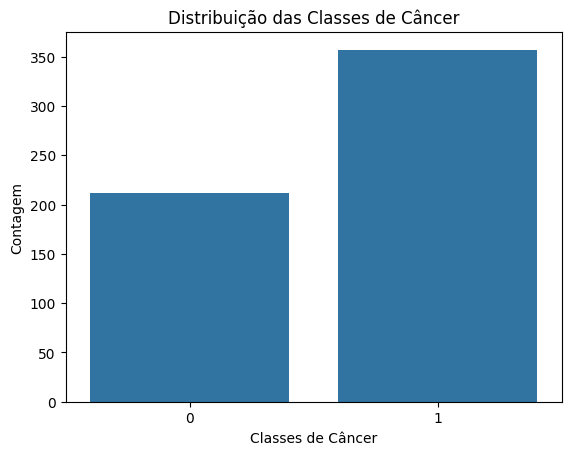

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

# Importando o conjunto de dados Breast Cancer
breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target

# Exibindo as primeiras linhas do conjunto de dados
print(df_breast_cancer.head())

# Informações básicas sobre o conjunto de dados
print(df_breast_cancer.info())

# Estatísticas descritivas
print(df_breast_cancer.describe())

# Distribuição das classes de câncer
sns.countplot(x='target', data=df_breast_cancer)
plt.title('Distribuição das Classes de Câncer')
plt.xlabel('Classes de Câncer')
plt.ylabel('Contagem')
plt.show()

# Pairplot para visualizar relações entre algumas características
sns.pairplot(df_breast_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])
plt.show()

# Heatmap da matriz de correlação
corr_matrix = df_breast_cancer.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot para visualizar a distribuição de características por classe de câncer
plt.figure(figsize=(12, 8))
sns.boxplot(x='target', y='mean radius', data=df_breast_cancer)
plt.title('Raio Médio por Classe de Câncer')
plt.xlabel('Classes de Câncer')
plt.ylabel('Raio Médio')
plt.show()

# Seleção de variáveis independentes (X) e dependente (y)
X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia}')

# Matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print('Matriz de Confusão:')
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(y_teste, y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)